# **[Problem Statement](https://)**

### The problem we are addressing is the difficulty farmers face in identifying diseases in chili plants at an early stage. Manual inspection is time-consuming, requires expertise, and is not always accurate. Because of this, diseases often spread before being detected, leading to crop loss. Our project aims to automate this process using image-based disease detection.

# **Objective**

## The main objectives of our project are:

### 1. To build a deep learning model that can classify chili leaf images as Healthy or Unhealthy.

### 2. To use Convolutional Neural Networks to automatically learn features from leaf images.

### 3. To reduce dependency on manual inspection by providing a fast and accurate prediction system.

## **Expected Outcomes**

### The expected outcome is a trained model that can take a chili leaf image as input and correctly predict whether the plant is healthy or diseased. This can help farmers take early action and reduce crop damage.

In [ ]:
# Install necessary packages
!pip install kaggle
!pip install split-folders
!pip install tensorflow
!pip install matplotlib


## **Chilli Disease Detection System**

In [ ]:
import os
import splitfolders
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt


**Loading the Data from Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
data_dir = "/content/drive/MyDrive/train"


## **Spliting the Data**

In [ ]:
import splitfolders

# Split your data: 70% train, 15% val, 15% test
splitfolders.ratio(data_dir,
                   output="/content/ChiliData_split",
                   seed=42,
                   ratio=(0.7, 0.15, 0.15))


Copying files: 200 files [00:01, 125.65 files/s]


## **Defining parameters and ImageDataGenerator**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale pixel values
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)
test_datagen  = ImageDataGenerator(rescale=1./255)

# Directories
train_dir = "/content/ChiliData_split/train"
val_dir   = "/content/ChiliData_split/val"
test_dir  = "/content/ChiliData_split/test"

# Generators
train_gen = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128,128),
    batch_size=16,
    class_mode='binary'
)

val_gen = val_datagen.flow_from_directory(
    val_dir,
    target_size=(128,128),
    batch_size=16,
    class_mode='binary'
)

test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=(128,128),
    batch_size=16,
    class_mode='binary',
    shuffle=False
)


Found 140 images belonging to 2 classes.
Found 30 images belonging to 2 classes.
Found 30 images belonging to 2 classes.


# **Building Convolution Neural Network Model**

In [ ]:
from tensorflow.keras import layers, models

# Build the CNN
model = models.Sequential([
    # Convolution + Pooling layer 1
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(128,128,3)),
    layers.MaxPooling2D(2,2),

    # Convolution + Pooling layer 2
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    # Convolution + Pooling layer 3
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D(2,2),

    # Flatten and Dense layers
    layers.Flatten(),
    layers.Dense(128, activation='relu'),

    # Output layer for binary classification
    layers.Dense(1, activation='sigmoid')  # 1 neuron for binary output
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',  # binary classification
    metrics=['accuracy']
)

# Check model summary
model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,304,769 (12.61 MB)

 Trainable params: 3,304,769 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

### **Training Data and Fitting it in model**

In [ ]:
# Train the model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5  # You can increase to 20–30 for better accuracy
)


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


9/9 ━━━━━━━━━━━━━━━━━━━━ 8s 631ms/step - accuracy: 0.4777 - loss: 0.7127 - val_accuracy: 0.5667 - val_loss: 0.6628
Epoch 2/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 440ms/step - accuracy: 0.6195 - loss: 0.6291 - val_accuracy: 0.7667 - val_loss: 0.4483
Epoch 3/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 564ms/step - accuracy: 0.8455 - loss: 0.4109 - val_accuracy: 0.8000 - val_loss: 0.3900
Epoch 4/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 5s 491ms/step - accuracy: 0.8557 - loss: 0.3353 - val_accuracy: 0.9333 - val_loss: 0.3127
Epoch 5/5
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 428ms/step - accuracy: 0.9016 - loss: 0.2446 - val_accuracy: 0.9000 - val_loss: 0.3128


### **Finding Accuracy**

In [ ]:
test_loss, test_acc = model.evaluate(test_gen)
print(f"Test Accuracy: {test_acc*100:.2f}%")


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.9556 - loss: 0.1802
Test Accuracy: 93.33%


## **Ploting Accuracy and Loss Curves**

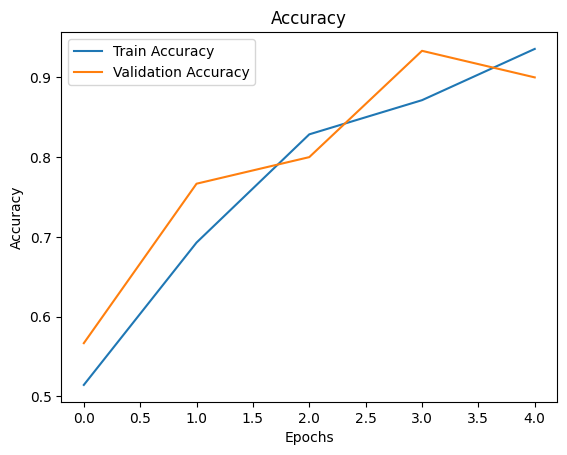

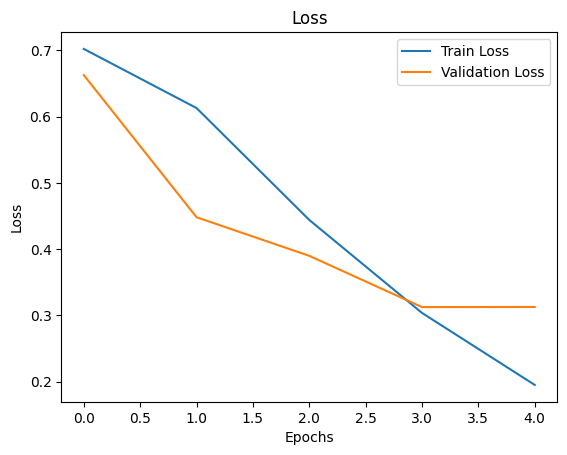

In [ ]:
import matplotlib.pyplot as plt

# Accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


## **Prediction By Model**

In [ ]:
# Predict on test set
test_gen.reset()  # Ensure generator starts from beginning
pred_prob = model.predict(test_gen)
pred_classes = (pred_prob > 0.5).astype(int).flatten()  # Convert probabilities to 0 or 1

# True labels
true_classes = test_gen.classes


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 469ms/step


# **Confusion Matrics**

In [ ]:
cm = confusion_matrix(true_classes, pred_classes)
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[15  0]
 [ 2 13]]


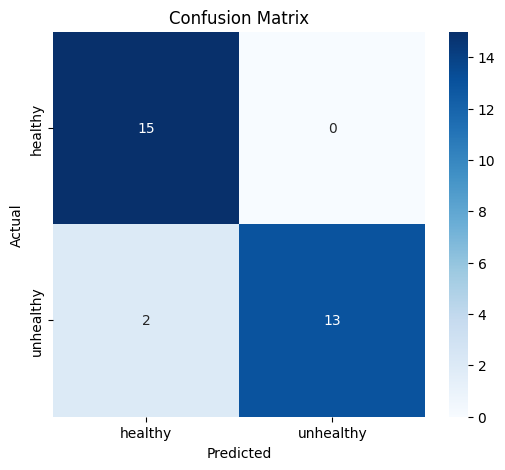

In [ ]:
class_names = list(test_gen.class_indices.keys())  # ['Healthy', 'Unhealthy']

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_names,
            yticklabels=class_names)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


# **Mismatched Data By MOdel**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.preprocessing import image

# Reset the test generator
test_gen.reset()

# Predict
pred_prob = model.predict(test_gen)
pred_classes = (pred_prob > 0.5).astype(int).flatten()

# True labels
true_classes = test_gen.classes

# Filenames
filenames = test_gen.filenames

# Find misclassified indices
misclassified_idx = np.where(pred_classes != true_classes)[0]
print(f"Total misclassified images: {len(misclassified_idx)}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 177ms/step
Total misclassified images: 2


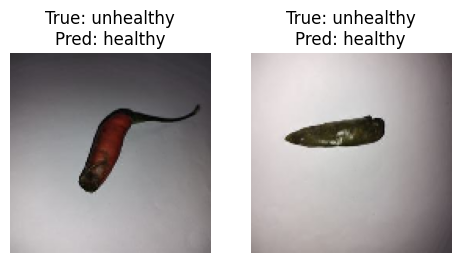

In [ ]:
# Display first 5 misclassified images
plt.figure(figsize=(15,6))

for i, idx in enumerate(misclassified_idx[:5]):
    img_path = os.path.join(test_dir, filenames[idx])
    img = image.load_img(img_path, target_size=(128,128))

    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True: {class_names[true_classes[idx]]}\nPred: {class_names[pred_classes[idx]]}")

plt.show()


In [ ]:
# Save the model in HDF5 format
model.save("/content/chili_classifier.h5")
print("Model saved successfully!")


Model saved successfully!


## **Saving the Model for Real Testing**

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
loaded_model = load_model("/content/chili_classifier.h5")


## **Testing by Giving Image as Data**

In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to your new image
img_path = "/content/drive/MyDrive/good_chili.jpg"

# Load and preprocess image
img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict
pred_prob = loaded_model.predict(img_array)
pred_class = (pred_prob > 0.5).astype(int)[0][0]

# Map to label
label = "Healthy" if pred_class == 0 else "Unhealthy"
print(f"Prediction: {label}, Probability: {pred_prob[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Prediction: Healthy, Probability: 0.00


In [ ]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Path to your new image
img_path = "/content/drive/MyDrive/bad_chili.jpg"

# Load and preprocess image
img = image.load_img(img_path, target_size=(128,128))
img_array = image.img_to_array(img) / 255.0  # Normalize
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension

# Predict
pred_prob = loaded_model.predict(img_array)
pred_class = (pred_prob > 0.5).astype(int)[0][0]

# Map to label
label = "Healthy" if pred_class == 0 else "Unhealthy"
print(f"Prediction: {label}, Probability: {pred_prob[0][0]:.2f}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Prediction: Unhealthy, Probability: 0.91
